# White Noise

when que receive a signal of only white noise the variance in theory will be infinite, but the observation through a device generate an impulse response that discreteize the signal and produce a finite variance. We age going to check this here in order to find a way to compute $n_0$ from:

$$\sigma^2 = \int \frac{N_0}{2} |H(f)| df$$

In [3]:
# generate a random noise, we are going to thin in regular grid using fft so the time sampling is not relevant.
from scipy.signal import welch
from matplotlib import mlab

import numpy as np
import scipy as sp
import scipy.signal as signal
import scipy.fftpack as fftpack
import random
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from mfilter.regressions import * #here it is the regression
from mfilter.types import FrequencySamples, TimeSeries, FrequencySeries, TimesSamples


/home/astro/.local/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5,1,'corr from FFT of welch and auto-corr.')

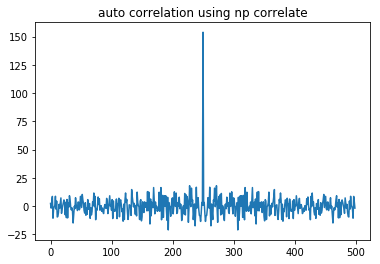

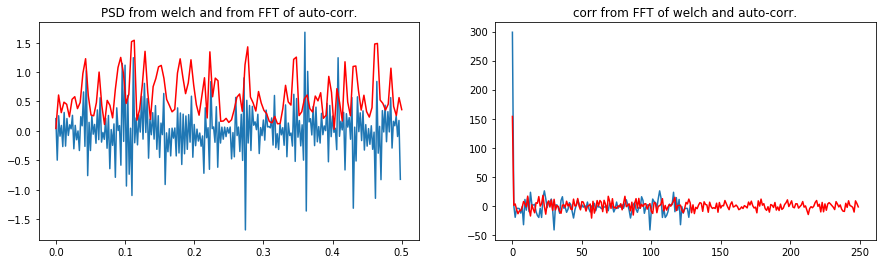

In [4]:
N = 500
true_sigma = 0.56
data = np.random.normal(0, true_sigma, N)

time = TimesSamples(n=N, delta=1, struct="regular")
dd = TimeSeries(data, times=time)
freq = FrequencySamples(input_time=time, 
                        minimum_frequency=np.fft.fftfreq(N, d=1)[1], 
                        maximum_frequency=np.fft.fftfreq(N, d=1)[N//2-1], 
                        samples_per_peak=1)
lw_psd = freq.lomb_scargle(time, dd, norm="psd")

# calculating the auto-correlation function on regular time
corr = np.correlate(data, data, mode="same")
plt.plot(corr)
plt.title("auto correlation using np correlate")
psd = sp.fftpack.fft(corr)
f, corr_s = welch(data, fs=1, return_onesided=True) 
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(15, 4))
ax1.plot(sp.fftpack.fftfreq(N, d=1)[:N//2], psd[:N//2]/N)
ax1.plot(f, corr_s, 'r')
ax1.set_title("PSD from welch and from FFT of auto-corr.")

ax2.plot(sp.fftpack.ifft(corr_s) * N)
ax2.plot(corr[N//2:], 'r')
ax2.set_title("corr from FFT of welch and auto-corr.")

0.30771907761076484


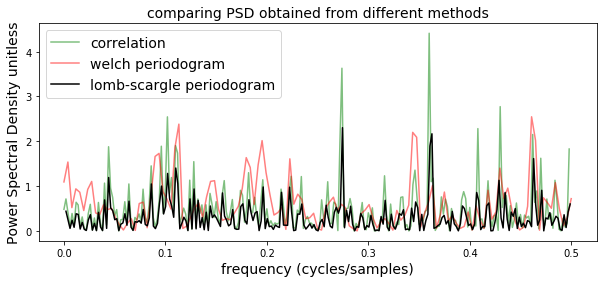

In [8]:
def autocovariance(Xi, N, k, Xs):
    autoCov = 0
    for i in np.arange(0, N-k):
        autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
    return (1/(N-1))*autoCov

fft_d = np.fft.fft(data)
norm = autocovariance(data, N, 0, np.average(data))
print(norm)
# norm = 1
psd_c = (np.abs(fft_d)**2) / norm
pxx, f = mlab.psd(data, Fs=1, sides="onesided")

plt.figure(figsize=(10, 4))
plt.plot(np.fft.fftfreq(N, d=1)[:N//2], psd_c[:N//2]/N/2, 'g', alpha=0.5, label="correlation")
plt.plot(f[:], pxx[:], 'r', alpha=0.5, label="welch periodogram")
plt.plot(freq, lw_psd, 'k', label="lomb-scargle periodogram")
plt.title("comparing PSD obtained from different methods", fontsize=14)
plt.legend(fontsize=14)
plt.xlabel("frequency (cycles/samples)", fontsize=14)
plt.ylabel("Power Spectral Density unitless", fontsize=14)
plt.savefig("PSD-normalization.png", dpi=300)

In [6]:
help(FrequencySamples)

Help on class FrequencySamples in module mfilter.types.frequencyseries:

class FrequencySamples(mfilter.types.arrays.Array)
 |  Method resolution order:
 |      FrequencySamples
 |      mfilter.types.arrays.Array
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, initial_array=None, input_time=None, minimum_frequency=None, maximum_frequency=None, samples_per_peak=None, nyquist_factor=2, n_samples=None, df=None)
 |      class for creation of frequency samples on regular grid, on custom
 |      values, using an oversampling factor.
 |      
 |      :param input_time:          Array or array-like
 |                                  times of the original data
 |      :param minimum_frequency:   scalar (real)
 |                                  minimum frequency to compute, default 0
 |      :param maximum_frequency:   scalar (real)
 |                                  maximum frequency to compute
 |      :param samples_per_peak:    integer
 |                     

In [ ]:
np.fft.fftfreq(N, d=1)[N//2-1]